### Short introduction:

I have been given two files, first file with the number of rides for each taxi company on November 15-16, 2017 and second file with the average number of rides that ended in each neighborhood in November 2017. I have been asked for:
 * [import the files](#import)
study the data they contain,
make sure the data types are correct.
 * [identify the top 10 neighborhoods in terms of drop-offs](#indentify)
make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs,
draw conclusions based on each graph and explain the results.
 * [Test the hypothesis:](#test)
"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

### Exploratory data analysis: <a class="anchor" id="import"></a>

In [2]:
import pandas as pd
df_company = pd.read_csv('/datasets/project_sql_result_01.csv')
print(df_company.head())
print(df_company.tail())
print(df_company.info())
print(df_company.describe())
dup = df_company.duplicated().sum()
print(dup)
print(len(df_company))

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
                     company_name  trips_amount
59   4053 - 40193 Adwar H. Nikola             7
60        2733 - 74600 Benny Jona             7
61  5874 - 73628 Sergey Cab Corp.             5
62     2241 - 44667 - Felman Corp             3
63    3556 - 36214 RC Andrews Cab             2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000
0
64


In [3]:
import pandas as pd
df_location = pd.read_csv('/datasets/project_sql_result_04.csv')
print(df_location.head())
print(df_location.tail())
print(df_location.info())
print(df_location.describe())
dup = df_location.duplicated().sum()
print(dup)
print(len(df_location))

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
   dropoff_location_name  average_trips
89       Mount Greenwood       3.137931
90             Hegewisch       3.117647
91              Burnside       2.333333
92             East Side       1.961538
93             Riverdale       1.800000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None
       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667
0
94


After studying the data I didn't find any missing values, all data types are correct and no duplicates were detected.

### Identify the top taxi companies and number of rides, 10 neighborhoods in terms of drop-offs and make graphs:<a class="anchor" id="indentify"></a> 

                        company_name  trips_amount
9  Blue Ribbon Taxi Association Inc.          5953
8          Star North Management LLC          7455
7                           Sun Taxi          7701
6                       City Service          8448
5          Chicago Carriage Cab Corp          9181
4    Taxi Affiliation Service Yellow          9299
3                         Yellow Cab          9888
2                  Medallion Leasing         10367
1          Taxi Affiliation Services         11422
0                          Flash Cab         19558


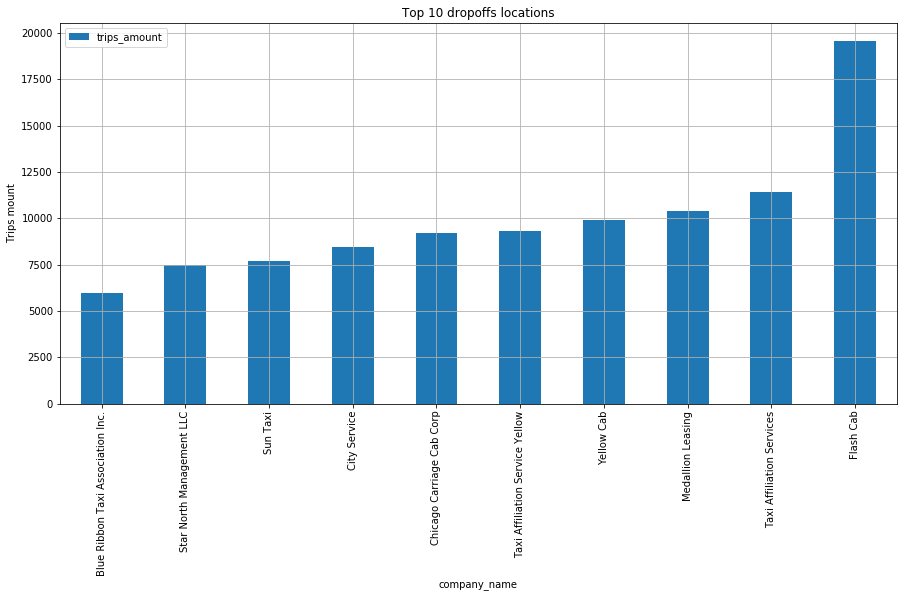

In [4]:
top_ten_companies = df_company.sort_values(by='trips_amount')
print(top_ten_companies.tail(10))
import matplotlib.pyplot as plt
top_ten_companies.tail(10).plot('company_name', 'trips_amount', kind = 'bar', figsize=(15, 7))
plt.title('Top 10 dropoffs locations')
plt.ylabel('Trips mount')
plt.grid()
plt.show()

There is significant gap between the first and the second place of taxi companies and the number of rides, the Flash Carb taxi company is an obvious leader with the biggest trips amount of 19558 rides wich is almost double from second place of Taxi Affiliation Services company with 11422 rides.The difference between second and third place is not substantial (around 1000 rides) compared to the first place, which means that companies on second and third place can be switched from time to time but the Flash Carb company looks like to stay for long time on top.

  dropoff_location_name  average_trips
9    Sheffield & DePaul    1259.766667
8            Gold Coast    1364.233333
7         Museum Campus    1510.000000
6            Grant Park    2068.533333
5             Lake View    2420.966667
4                O'Hare    2546.900000
3             West Loop    5163.666667
2         Streeterville    6664.666667
1           River North    9523.666667
0                  Loop   10727.466667


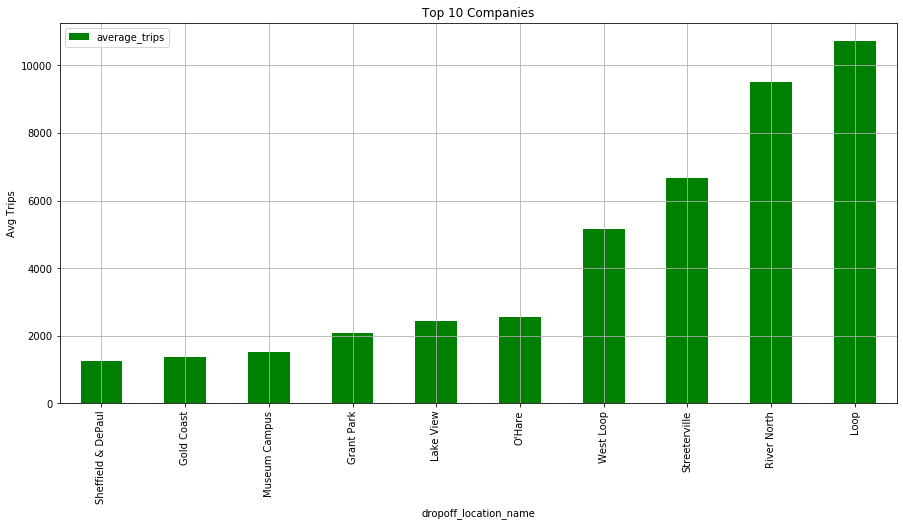

In [5]:
top_ten_locations = df_location.sort_values(by='average_trips')
print(top_ten_locations.tail(10))
import matplotlib.pyplot as plt
top_ten_locations.tail(10).plot('dropoff_location_name', 'average_trips', kind = 'bar', figsize=(15, 7), color='green')
plt.title('Top 10 Companies')
plt.ylabel('Avg Trips')
plt.grid()
plt.show()

The most drop off locations are Loop and River North wich I can suppose located far away from center.

In [6]:
import pandas as pd
df_trips = pd.read_csv('/datasets/project_sql_result_07.csv')
print(df_trips.head())
print(df_trips.tail())
print(df_trips.info())
df_trips['start_ts'] = pd.to_datetime(df_trips['start_ts'])
print(df_trips.describe())
dup = df_trips.duplicated().sum()
print(dup)
print(len(df_trips))
print(df_trips.info())
print(df_trips.head())

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0
                 start_ts weather_conditions  duration_seconds
1063  2017-11-25 11:00:00               Good               0.0
1064  2017-11-11 10:00:00               Good            1318.0
1065  2017-11-11 13:00:00               Good            2100.0
1066  2017-11-11 08:00:00               Good            1380.0
1067  2017-11-04 16:00:00                Bad            2834.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object

After studying the data I didn't find any missing values, I changed data type of start_ts column to datetime type couse its more appropriate but in this case it won't effect any farther analysis, no duplicates were detected.

### Test the hypothesis:<a class="anchor" id="test"></a> 
##### "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

H0 hypothesis that the duration of rides from the Loop to O'Hare International Airport on rainy Saturdays and on good weather conditions are equal.<br>
H1 hypothesis that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.<br>
Alpha level for every statistical test sets for 5%.


In order to identify if two sample groups have equal variance I used the Leven's test.<br>
Hypotheses for the Leven's test:
<br>H0:The sample groups have equal variance
<br>H1:The sample groups do not have equal variance

In [7]:
from scipy import stats as st

good_saturdays = df_trips[df_trips['weather_conditions'] == 'Good']

rainy_saturdays = df_trips[df_trips['weather_conditions'] == 'Bad']

print('The average duration of rides on good saturdays {:0.2f}'.format(good_saturdays['duration_seconds'].mean()))

print('The average duration of rides on rainy saturdays {:0.2f}'.format(rainy_saturdays['duration_seconds'].mean()))

alpha = 0.05 # critical statistical significance

levene_results = st.levene(good_saturdays['duration_seconds'], rainy_saturdays['duration_seconds'], center='mean')

print('p-value: ', levene_results.pvalue)

if (levene_results.pvalue < alpha):
        print("We reject the null hypothesis, the sample groups do not have equal variance")
else:
        print("We can't reject the null hypothesis, the sample groups have equal variance") 

results = st.ttest_ind(
        good_saturdays['duration_seconds'], 
        rainy_saturdays['duration_seconds'],
        )

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

The average duration of rides on good saturdays 1999.68
The average duration of rides on rainy saturdays 2427.21
p-value:  0.3968505113995001
We can't reject the null hypothesis, the sample groups have equal variance
p-value:  6.517970327099473e-12
We reject the null hypothesis


### Conclusions:

First I used Levene's test to determine if the two sample groups have equal variance, null hypothesis is that the groups have equal variance, according to analysis we can't reject the null hypothesis. Then in order to test the hypothes if the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays I applied the stats.ttest_ind method, equal_var=True set by default. The null hypothesis is that the average duration of rides are equal on rainy Saturdays.
According to analysis we reject the null hypothesis, that's means that with probability of 95% we can conclude that average time of ride from the Loop to O'Hare International Airport on rainy Saturdays is not same as when it's not rainy. After I calculated the average time of both cases I suppose that the average time of ride is longer on rainy days in general and it's can be explained by worst drive conditions.
Thank you for reading.